<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Classification_and_regression_Tree%2C_importing_zip_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CART

Classification method.

Sequence of if-else questions about individual features

Objective infer class labels

Trees are able to capture non-linear relationships between features and labels

**Trees dont require scaling. Like standardScaler or normalizer**

Unlike LogisticRegression, CART produces rectangular decision regions.

A decision region is a region where all instances are assigned to one class label.

## Decision Tree for classification

### Decision Tree with 2 features Breast Cancer Dataset

In [ ]:
# We are going to use Wisconsin Breast Cancer Dataset from Kaggle
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv

import numpy as np
import pandas as pd

path_df = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

df = pd.read_csv(path_df,header=None)
df.head(20)

X= df[[2,9]]
X.head()



,2,9
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430


In [ ]:
# y is in the 1st column. Map M and B to 1 and 0
mapping = {'M':1,'B':0}

df[1].head()

y = df[1].map(mapping)
y.head()


0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree

SEED = 1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 1 1 0 1]


In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

# Using only two features, your tree was able to achieve an accuracy of 91%!

Test set accuracy: 0.91


Building blocks of a decision tree

a Decision Tree is a Data Structure consisting of a hierarchy of nodes

Every node involves a question or a prediction.

**the root** is the node at which the decision tree start growing. No parent node, give rise to two children nodes

**internal node** node that has a parent, question that , give rise to two children nodes

**leaf node** one parent no children. Is where prediction is made. The objective is to have the purest leaves.

Every split increases information gain. There are many criterion the most important are "Gini" and "Entropy".

IF information gain is 0 for splitting. That node is a leaf, unless the tree is contrained with n_depth




### Decision Tree comparative for criterion entropy and gini

In [ ]:
# We change X for the 30 features of the dataset

X = df.iloc[:,2:]
X.shape

(569, 30)

compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)


# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)


# Notice how the two models achieve almost the same accuracy.
# Most of the time, the gini index and entropy lead to the same results. 
# The gini index is slightly faster to compute and is the default criterion 
# used in the DecisionTreeClassifier model of scikit-learn.

Accuracy achieved by using entropy:  0.8830409356725146
Accuracy achieved by using the gini index:  0.9064327485380117


## Decision Tree for Regression

### Importing auto dataset and cleaning

Continuous target value

Lot's of works on https://www.kaggle.com/uciml/autompg-dataset/notebooks

In [ ]:
import pandas as pd
from tensorflow import keras

dataset_path = keras.utils.get_file("auto-mpg.data-original",'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original')


column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

df1 = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

df1.head()


32768/32149 [==============================] - 0s 2us/step


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [ ]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

### Using DecisionTreeRegressor

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt

# min_samples_leaf=.13 means at least 13% of training data in each leaf.
# this is a stoping condition.

dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE
# The impurity of the node is measured by using the MSE in that node.
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.26


# The bias-Variance Tradeoff

Fin a model *f^* that best approximates to *f* that is the function that exists in reality.

*f^* can be a logistic regression, Decision Tree, Neural Network,...

Discard noise as much as possible. The end goal is that *f^* should achieve a low predictive error on unseen datasets

2 difficulties: Overffiting where *f^* fits the noise in the training set and the second one is underfitting *f^* is not flexible enough to approximate to *f*.

The generalization error tells how well *f^* generalizes on unseen data.

Generalization error = It can be decomposed into 3: **bias** + **variance** + **irreducible error**

The bias term tells you on average how much *f^* is different to *f*.

The variance term tells you how much *f^* is inconsistent over different training sets.

The goal is to minimize the generalization error that is the sum of **bias** and **variance** with irreducible error being constant.

This is known as the bias-Variance Tradeoff


## If CV error > training set error --> suffers high variance (overfitting) and viceversa

We do this because we are making models without hyperparameter tuning. So we choose hyperparameters before fitting.

In [ ]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

**A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.**

So we are going to compute CV with only X_train and y_train first.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

# Compute the array containing the 10-folds CV MSEs
# You see the negative there because CV only has neg_mean_squared_error for scoring
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

# Notice how the training error is roughly equal to the 10-folds CV error

CV RMSE: 0.24
Train RMSE: 0.23


# Voting Classifier (Ensemble Learning)

## Limitations of CART. 

Can only produce orthogonal decision boundaries

Sensitive to small variation of training set. 

Suffers for high variance if not constrain.

SOLUTION: Ensemble Learning

For example an Ensemble Learning for classification problem makes 3 models with DecisionTree, LogisticRegression and KNN. Each of them makes a prediction. The selection of the best is through Voting Classifier, for example DecisionTree, LogisticRegression and KNN predicts 1,0,1 in a binary decision model. Through voting the result would be 1.


In [ ]:
column_names = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']

X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv',names=column_names)

X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
display(X.isnull().sum())
X.dropna(inplace=True)
display(X.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:

y = X.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [ ]:

X.drop(['Dataset'],inplace=True,axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
mapping = {'Female':0, 'Male':1}
X['Gender'] = X['Gender'].map(mapping)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


## Voting Classifier

In [ ]:
# Accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import all model for ensemble and Voting Classifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# For reproducibility
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED,stratify=y)

# Define a list of classifiers Instantiate them

classifiers = [('Logistic Regression', LogisticRegression(random_state=SEED)),
               ('K Nearest neighbor', KNN(n_neighbors=27)),
               ('Classification Tree', DecisionTreeClassifier(min_samples_leaf=0.13,random_state=SEED))]

for classif_name, classifier in classifiers:
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  print('{:s} : {:.3f}'.format(classif_name,accuracy_score(y_test,y_pred)))

# Instantiate a VotingClassifier
vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

print('Voting Classifier: {}'.format(accuracy_score(y_test,y_pred)))



Logistic Regression : 0.678
K Nearest neighbor : 0.690
Classification Tree : 0.678
Voting Classifier: 0.6954022988505747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# Bagging and Random Forests

## Bagging (Bootstrap Aggregation)

Voting classifier is an ensemble of models  that fits into the same training set using different algorithms.

In Baggins we use **one** algorithm but different subsets of bootstrapping training sets. Bootstraping sample with replacement.

In classification it predicts by majority voting with BaggingClassifier 

In regression the final prediction is through averaging. BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# For reproducibility
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED,stratify=y)

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))


Test set accuracy of bc: 0.72


## Bagging with OOB Evaluation

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# For reproducibility
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED,stratify=y)

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.724, OOB accuracy: 0.685


# Random Forests

Random Forest Classification 
Random Forest Regressor

Another Ensemble Learning method.

In bagging the estimator can be any model. We select one to fit on *n* bootstrapped dataset.

Random Forest uses Decision Tree as an estimator. Each estimator is trained on a different bootstrap sample having the same size as the training set.

Random Frest introduces **further randomization** in the training on individual trees than bagging. Because only *d* features are sampled at each node without replacement (all the other with replacement). *d* is a number < total number of *features*.





## Random Forest Regressor

###Importing a .zip dataset

In [ ]:
# use curl to get the data set from UCI
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

# unzip the data, use -o to overwrite, we only need the file hour.csv
!unzip -o Bike-Sharing-Dataset.zip hour.csv

# import the data using pandas
df = pd.read_csv("hour.csv")
df.head()

Archive:  Bike-Sharing-Dataset.zip
  inflating: hour.csv                


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Dataset

df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv')
display(df.head())
df.shape

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


(1488, 13)

In [ ]:
y = df['cnt']

X = df.drop('cnt',axis=1)

print(y.head())
print(X.head())
print(y.shape)
print(X.shape)

0    149
1     93
2     90
3     33
4      4
Name: cnt, dtype: int64
   hr  holiday  workingday  ...  Clear to partly cloudy  Light Precipitation  Misty
0   0        0           0  ...                       1                    0      0
1   1        0           0  ...                       1                    0      0
2   2        0           0  ...                       1                    0      0
3   3        0           0  ...                       1                    0      0
4   4        0           0  ...                       1                    0      0

[5 rows x 12 columns]
(1488,)
(1488, 12)


### Random Forest Regressor

In [ ]:

from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

                           
# Fit rf to the training set            
rf.fit(X_train, y_train)  

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 51.84


### Visualizing features importances



You'll determine which features were the most predictive according to the random forests regressor 

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas

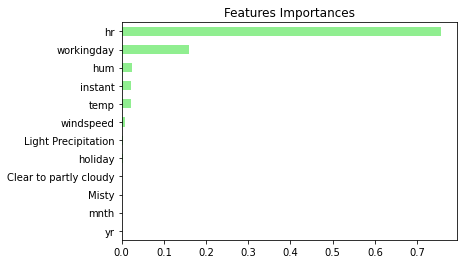

In [ ]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Boosting

Each predictor tries to correct its predecessor

Most popular boosting methods: AdaBoost and Gradient Boosting

Adaboost: Adapting boosting. Each predictor pays more attention to the instances wrongly predicted by its predecessor. Changes the weights of training instances. Each predictor is assigned one alpha coefficient that is used to obtain final result. Alpha depends on the predictor's training error. Also there is a parameter that is learning rate *etha* that goes from 0 to 1.




In [ ]:
import pandas as pd
# Dataset
column_names = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']

X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv',names=column_names)

display(X.isnull().sum())
X.dropna(inplace=True)
display(X.isnull().sum())
y = X.iloc[:,-1]

X.drop(['Dataset'],inplace=True,axis=1)

mapping = {'Female':0, 'Male':1}
X['Gender'] = X['Gender'].map(mapping)
X.head()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

ada.predict_proba(X_test)[:,1]


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)
 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED,stratify=y)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))


ROC AUC score: 0.68


## Gradient Boosted Trees

Unlike Adaboost it does not tweak the weight of training instances

Fit each predictor using its predecessor's residual errors as labels.

CART is used as a base learner

Also learning rate *etha*

### GradientBoostingRegressor

In [ ]:
# Dataset bike sharing demand.

df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv')
display(df.head())
y = df['cnt']

X = df.drop('cnt',axis=1)

print(y.head())
print(X.head())
print(y.shape)
print(X.shape)

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


0    149
1     93
2     90
3     33
4      4
Name: cnt, dtype: int64
   hr  holiday  workingday  ...  Clear to partly cloudy  Light Precipitation  Misty
0   0        0           0  ...                       1                    0      0
1   1        0           0  ...                       1                    0      0
2   2        0           0  ...                       1                    0      0
3   3        0           0  ...                       1                    0      0
4   4        0           0  ...                       1                    0      0

[5 rows x 12 columns]
(1488,)
(1488, 12)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))


Test set RMSE of gb: 43.113


### Stochastic GradientBoostingRegressor

GradientBoosting involves exhaustive search procedures. and can train the same examples because 100% is whith replacement.

Each tree is trained on a random subset of rows of the training data

The sampled instances (40%-80% of the training set) are sampled without replacement

Features are sampled without replacement when choosing split points

Result further ensemble diversity and adds further variance.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

# Instantiate gb
sgb = GradientBoostingRegressor(max_depth=4,
                               subsample = 0.9, #each tree samples 90% of the data for training
                               n_estimators=200,
                               max_features=0.75, #each tree uses 75% of available features to perfom the best-split
                               random_state=2)

# Fit gb to the training set
sgb.fit(X_train, y_train)

# Predict test set labels
y_pred = sgb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 45.143


# Model Tuning

Parameter learned from data

Hyperparameter are not learned from data. They are set prior to training.

In CART there are max_depth, max_features, min_samples_leaf and splitting criterion.

Search for the set of optimal hyperparameters to lead and optimal model = optimal score. In classification accuracy and in regression R2.

Cross-Validation is used to estimate the generalization performance.


A model default hyperparameter are not optimal for all problems.

In this course we are going to use **GridSearchCV**, but there are others like Bayesian Optimization, random search and others.



## GridSearchCV

In [ ]:
# We are going to use Wisconsin Breast Cancer Dataset from Kaggle
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv

import numpy as np
import pandas as pd

path_df = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

df = pd.read_csv(path_df,header=None)
df.head()

y = df[1].map(mapping)
print(y.head())
X = df.iloc[:,2:]
X.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

X= df[[2,9]]
display(X.head())
# y is in the 1st column. Map M and B to 1 and 0
mapping = {'M':1,'B':0}

df[1].head()

y = df[1].map(mapping)
y.head()

## DecisionTree classifier with tuning

In [ ]:
# Define params_dt
params_dt = {
             'max_depth': [2, 3, 4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
            }

            # Import GridSearchCV
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=1)


# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_
print(best_model)
# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
Test set ROC AUC score: 0.921


## Random Forest + Tuning Hyperparameters

Hyperparameter tuning is computationally expensive and sometimes leads to very slight improvement

In [ ]:
# Dataset bike sharing demand.

df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv')
display(df.head())
y = df['cnt']

X = df.drop('cnt',axis=1)

print(y.head())
print(X.head())
print(y.shape)
print(X.shape)

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


0    149
1     93
2     90
3     33
4      4
Name: cnt, dtype: int64
   hr  holiday  workingday  ...  Clear to partly cloudy  Light Precipitation  Misty
0   0        0           0  ...                       1                    0      0
1   1        0           0  ...                       1                    0      0
2   2        0           0  ...                       1                    0      0
3   3        0           0  ...                       1                    0      0
4   4        0           0  ...                       1                    0      0

[5 rows x 12 columns]
(1488,)
(1488, 12)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

# Instantiate rf
rf = RandomForestRegressor(random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   43.6s finished


Test RMSE of best model: 51.755
